# Método predictor-corrector de Adams-Bashforth-Moulton de 4to orden

Estuardo Díaz, 16110

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

Este método nos permite aproximar una solución para $t\in [a,b]$ para la ecuación 
$$ f(x,t) = \frac{\partial x}{\partial t}$$

El método recibe la función $f$, un punto inicial $x_0$ y la lista de todos los puntos para los cuales queremos calcular los respectivos $x$. En el caso general, $x$ puede ser un vector y $f$ una función vectorial, con lo cual se tiene realmente un sistema de ecuaciones.

Para garantizar el funcionamiento del método, se pide que $f$ sea continua y cumpla con la condición de Lipschits, i.e. 
$|f(x_1)-f(x_2)| \leq B|x_1-x_2|^\beta$, $\beta > 0$, $\forall |x_1-x_2| < \epsilon$.

El método de Adams-Bashforth-Moulton es realmente una modificación del método de Runge-Kutta. Primero se calculan tres constantes $f_1,f_2,f_3$ utilizando el metodo de Runge-Kutta y luego se utiliza el método de Adams-Bashforth-Moulton.

### Método:
\begin{align}
t_{k+1} &= t_k + h\\
p_{k+1} &= x_k + \frac{h}{24}\big( 55f_k - 59f_{k-1} + 37f_{k-2} - 9f_{k-3}\big) \\
x_{k+1} &= x_k + \frac{h}{24}\big( 9f(t_{k+1},p_{k+1}) + 19f_k - 5f_{k-1} + f_{k-2} \big) \\
\end{align}
Donde $f_k = f(x_k,t_k)$ y $a\leq t \leq b$

In [49]:
# Implementación:
# Recibe la funcion f(x,t), x_0 como la condicion inicial y la lista de los valores de t
# en donde se calculara la solucion
def pc4( f, x0, t ):
    n = len( t )
    x = np.array( [ x0 ] * n )
    
    # Empezamos con el metodo de Runge-Kutta de 4to orden.
    # Los pasos adicionales que involucran las fi son para minimizar el
    # numero de evaluaciones de la funcion necesarias.

    f1 = f2 = f3 = 0
    for i in range( min( 3, n - 1 ) ):
        h = t[i+1] - t[i]
        f0 = f( x[i], t[i] )
        k1 = h * f0
        k2 = h * f( x[i] + 0.5 * k1, t[i] + 0.5 * h )
        k3 = h * f( x[i] + 0.5 * k2, t[i] + 0.5 * h )
        k4 = h * f( x[i] + k3, t[i+1] )
        x[i+1] = x[i] + ( k1 + 2.0 * ( k2 + k3 ) + k4 ) / 6.0
        f1, f2, f3 = ( f0, f1, f2 )

    # Empieza el método de Adams-Bashforth-Moulton

    for i in range( 3, n - 1 ):
        h = t[i+1] - t[i]
        f0 = f( x[i], t[i] )
        p = x[i] + h * ( 55.0 * f0 - 59.0 * f1 + 37.0 * f2 - 9.0 * f3 ) / 24.0
        fp = f( p, t[i+1] )
        x[i+1] = x[i] + h * ( 9.0 * fp + 19.0 * f0 - 5.0 * f1 + f2 ) / 24.0
        f1, f2, f3 = ( f0, f1, f2 )

    return x

## Ejemplo
Consideremos la ecuación diferencial $$\frac{\partial x}{\partial t} = 1- tx$$ La solución exacta es $$x(t) = ce^{-t^2/2} + \sqrt{\frac{\pi}{2}}e^{-t^2/2} erfi\big(\frac{t}{\sqrt{2}}\big)$$

In [50]:
def f(x,t):
    return 1-x*t

In [51]:
def sol(t,c=0):
    return np.exp(-(t**2)/2)*(c+np.sqrt(np.pi/2)*special.erfi(t/np.sqrt(2)))

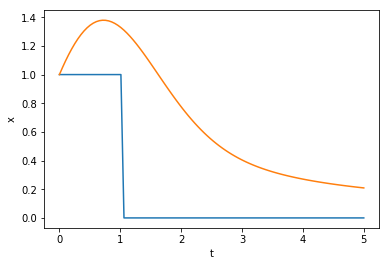

In [52]:
t = np.linspace(0,5,100)
x0 = 1
x = pc4(f,x0,t)
y = sol(t,1)
plt.plot(t,x)
plt.plot(t,y)
plt.ylabel('x')
plt.xlabel('t')
plt.show()

In [30]:
x

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])